#Convolutional Neural Networks

A CNN is a type of deep neural network that is commonly used for tasks involving images. It consists of multiple layers including convolutional layers, pooling layers, and fully connected layers. The convolutional layers learn to extract features from input images by sliding kernels over them.


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Step 2: Load and Preprocess Data
def prepare_dataset():
    (train_ds, test_ds), ds_info = tfds.load(
        'cifar10',
        split=['train', 'test'],
        as_supervised=True,
        with_info=True
    )

    def normalize_image(image, label):
        # Normalize images to [0, 1] range
        return tf.cast(image, tf.float32) / 255.0, label

    train_ds = train_ds.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    test_ds = test_ds.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    return train_ds, test_ds

# Step 3: Build the CNN Model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    return model

# Step 4: Compile and Train the Model
def train_model(model, train_ds, test_ds):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_ds.batch(64),
                        epochs=10,
                        validation_data=test_ds.batch(64))

    return history

# Step 5: Evaluate the Model
def evaluate_model(model, test_ds):
    loss, accuracy = model.evaluate(test_ds.batch(64))
    print(f"Test accuracy: {accuracy * 100:.2f}%")

# Main function to run the pipeline
def main():
    # Load and prepare dataset
    train_ds, test_ds = prepare_dataset()

    # Build the model
    model = build_model()

    # Train the model
    history = train_model(model, train_ds, test_ds)

    # Evaluate the model
    evaluate_model(model, test_ds)

# Entry point of the program
if __name__ == "__main__":
    main()

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete4X7ODN/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incomplete4X7ODN/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Epoch 1/10
782/782 [==============================] - 78s 98ms/step - loss: 1.5974 - accuracy: 0.4169 - val_loss: 1.3247 - val_accuracy: 0.5190
Epoch 2/10
782/782 [==============================] - 63s 81ms/step - loss: 1.2417 - accuracy: 0.5552 - val_loss: 1.1434 - val_accuracy: 0.5908
Epoch 3/10
782/782 [==============================] - 65s 83ms/step - loss: 1.0884 - accuracy: 0.6164 - val_loss: 1.0504 - val_accuracy: 0.6273
Epoch 4/10
782/782 [==============================] - 65s 83ms/step - loss: 0.9985 - accuracy: 0.6483 - val_loss: 0.9940 - val_accuracy: 0.6494
Epoch 5/10
782/782 [==============================] - 69s 88ms/step - loss: 0.9307 - accuracy: 0.6734 - val_loss: 0.9503 - val_accuracy: 0.6657
Epoch 6/10
782/782 [==============================] - 64s 81ms/step - loss: 0.8740 - accuracy: 0.6950 - val_loss: 0.9273 - val_accuracy: 0.6814
Epoch 7/10
78

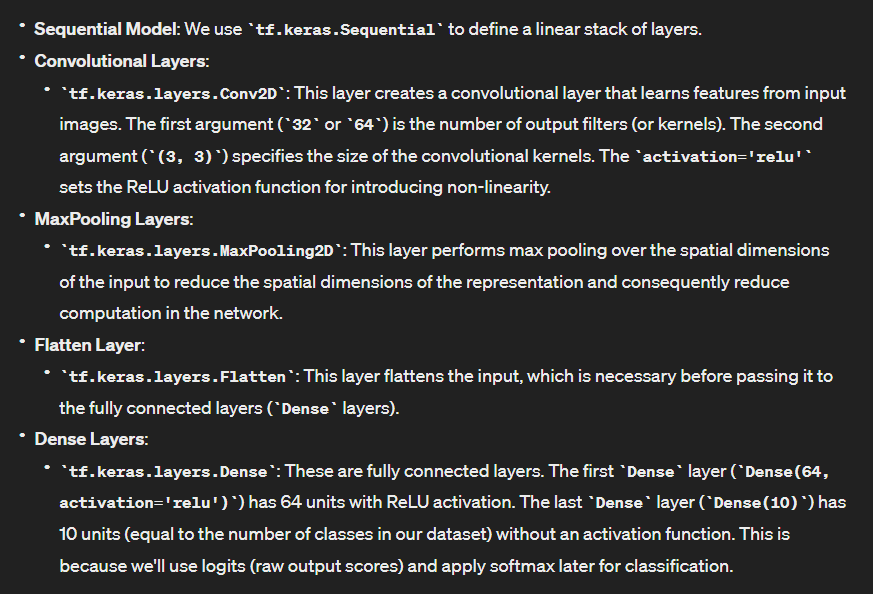

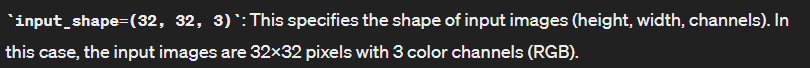

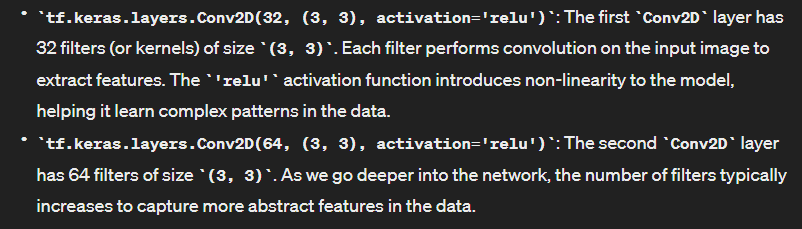

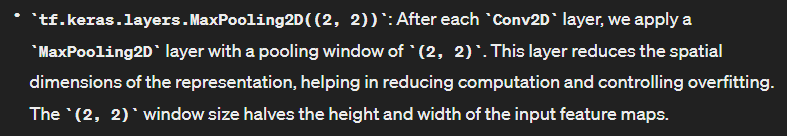

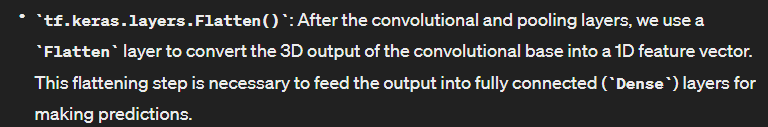

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Step 2: Load and Preprocess Data
def prepare_dataset():
    (train_ds, test_ds), ds_info = tfds.load(
        'mnist',
        split=['train', 'test'],
        as_supervised=True,
        with_info=True
    )

    def normalize_image(image, label):
        # Normalize images to [0, 1] range and resize to (32, 32)
        image = tf.image.resize(image, (32, 32))
        return tf.cast(image, tf.float32) / 255.0, label

    train_ds = train_ds.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    test_ds = test_ds.map(normalize_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    return train_ds, test_ds

# Step 3: Build the CNN Model
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.MaxPooling2D((2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(10)
    ])

    return model

# Step 4: Compile and Train the Model
def train_model(model, train_ds, test_ds):
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                  metrics=['accuracy'])

    history = model.fit(train_ds.batch(64),
                        epochs=10,
                        validation_data=test_ds.batch(64))

    return history

# Step 5: Evaluate the Model
def evaluate_model(model, test_ds):
    loss, accuracy = model.evaluate(test_ds.batch(64))
    print(f"Test accuracy: {accuracy * 100:.2f}%")

# Main function to run the pipeline
def main():
    # Load and prepare dataset
    train_ds, test_ds = prepare_dataset()

    # Build the model
    model = build_model()

    # Train the model
    history = train_model(model, train_ds, test_ds)

    # Evaluate the model
    evaluate_model(model, test_ds)

# Entry point of the program
if __name__ == "__main__":
    main()

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
Epoch 1/10
938/938 [==============================] - 73s 77ms/step - loss: 0.1675 - accuracy: 0.9469 - val_loss: 0.0605 - val_accuracy: 0.9818
Epoch 2/10
938/938 [==============================] - 68s 72ms/step - loss: 0.0461 - accuracy: 0.9859 - val_loss: 0.0398 - val_accuracy: 0.9879
Epoch 3/10
938/938 [==============================] - 69s 74ms/step - loss: 0.0328 - accuracy: 0.9900 - val_loss: 0.0347 - val_accuracy: 0.9888
Epoch 4/10
938/938 [==============================] - 72s 76ms/step - loss: 0.0249 - accuracy: 0.9927 - val_loss: 0.0320 - val_accuracy: 0.9912
Epoch 5/10
938/938 [==============================] - 69s 73ms/step - loss: 0.0206 - accuracy: 0.9933 - val_loss: 0.0382 - val_accuracy: 0.9894
Epoch 6/10
938/938 [==============================] - 69s 73ms/step - loss: 0.0177 - accuracy: 0.9943 - val_loss: 0.0344 - val_accuracy: 0.9909
Epoch 7/10
938/93

#1. Basics of CNNs

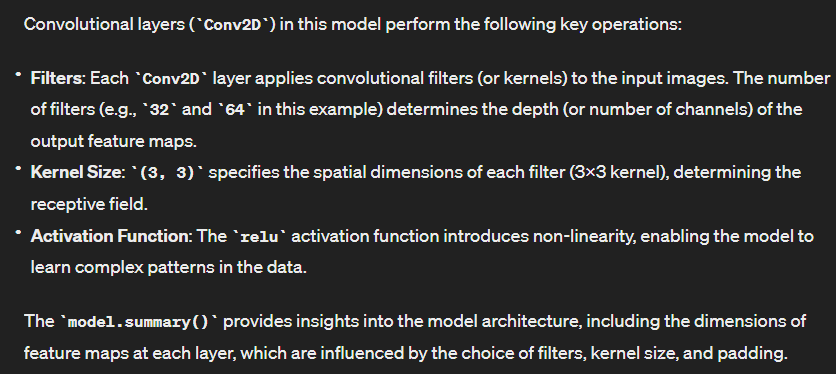

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define the CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu')
])

model.summary()

11490434/11490434 [==============================] - 1s 0us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_29 (Conv2D)          (None, 3, 3, 64)          36928     
                                                       

Convolutional operations are fundamental in Convolutional Neural Networks (CNNs) for processing and extracting features from input data, especially in tasks involving image recognition and analysis.


# Importance of Convolutions
1. Feature Extraction: Convolutions allow CNNs to automatically extract meaningful features from raw input data, such as images. These features can range from simple edges and textures to complex patterns and structures relevant to the task at hand (e.g., object shapes in image classification).

2. Spatial Hierarchical Learning: Convolutions capture spatial hierarchies within the data. Lower layers detect low-level features like edges and corners, while deeper layers combine these features to recognize more complex patterns and objects.

3. Parameter Sharing: Convolutions use shared weights (or filters) across the entire input, reducing the number of parameters compared to fully connected networks. This sharing of parameters enables the network to generalize better and learn efficiently from limited training data.

# Performing Convolution
1. Kernel (Filter) Application: A convolutional operation involves sliding a small matrix called a kernel (or filter) over the input data (e.g., an image). The kernel's elements represent weights that are learned during training.

2. Element-wise Multiplication and Summation: At each position of the kernel's sliding window, element-wise multiplication is performed between the kernel and the overlapping portion of the input data. The results are then summed to produce a single value in the output feature map.

3. Stride and Padding: The stride determines the step size of the kernel's movement across the input, influencing the spatial dimensions of the output feature map. Padding can be applied to the input to preserve spatial dimensions and avoid losing information at the borders.

# Why We Need Convolutions
1. Local Receptive Fields: Convolutions leverage local receptive fields, allowing the network to focus on small regions of the input at a time. This locality enables the model to capture spatial relationships and translational invariance (e.g., recognizing an object regardless of its position in the image).

2. Feature Hierarchies: By stacking multiple convolutional layers, CNNs can build hierarchical representations of the input data, gradually learning more abstract and complex features. This process mimics the hierarchical organization of visual processing in the human brain.

3. Efficient Feature Learning: Convolutions efficiently extract relevant features from high-dimensional data (like images) while reducing computational complexity. This efficiency is crucial for training deep neural networks on large-scale datasets.

#Pooling Operations

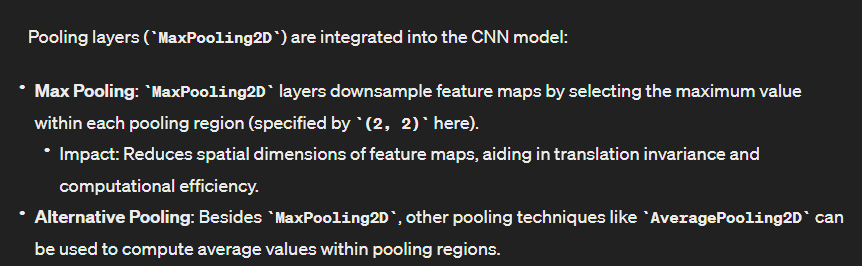

In [ ]:
# Continue with model definition and compilation
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

Epoch 1/10


Exception ignored in: <function _xla_gc_callback at 0x7ce02b7f1870>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


1688/1688 [==============================] - 110s 32ms/step - loss: 0.3542 - accuracy: 0.9157 - val_loss: 0.0669 - val_accuracy: 0.9827
Epoch 2/10
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0610 - accuracy: 0.9830 - val_loss: 0.0448 - val_accuracy: 0.9882
Epoch 3/10
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0420 - accuracy: 0.9891 - val_loss: 0.0455 - val_accuracy: 0.9885
Epoch 4/10
1688/1688 [==============================] - 50s 30ms/step - loss: 0.0337 - accuracy: 0.9909 - val_loss: 0.0376 - val_accuracy: 0.9890
Epoch 5/10
1688/1688 [==============================] - 51s 30ms/step - loss: 0.0277 - accuracy: 0.9923 - val_loss: 0.0386 - val_accuracy: 0.9902
Epoch 6/10
1688/1688 [==============================] - 49s 29ms/step - loss: 0.0238 - accuracy: 0.9932 - val_loss: 0.0326 - val_accuracy: 0.9910
Epoch 7/10
1688/1688 [==============================] - 49s 29ms/step - loss: 0.0199 - accuracy: 0.9943 - val_loss: 0.0349 - val_accur

#Filters
In a convolutional layer, filters (also known as kernels) are small matrices that slide over the input data to perform convolutional operations. Each filter is responsible for detecting specific features in the input.

In [ ]:
from tensorflow.keras import layers, models

# Define a CNN model with filters in convolutional layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2))
])

model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


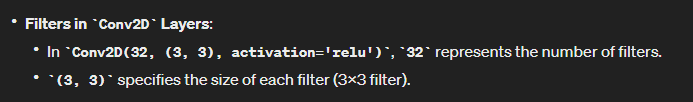

#Strides

Strides determine the step size of the filter's movement across the input data during convolution.

In [ ]:
# Specify convolutional layers with custom strides
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', strides=(1, 1), input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', strides=(2, 2)),
    layers.MaxPooling2D((2, 2))
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_33 (Conv2D)          (None, 6, 6, 64)          18496     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 3, 3, 64)          0         
 ng2D)                                                           
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


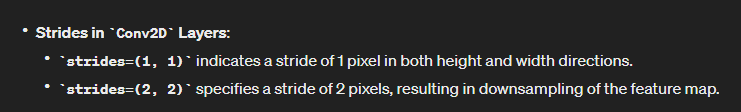

#Padding
Padding controls the spatial dimensions of the output feature map by adding extra rows and columns of zeros around the input data.

In [ ]:
# Specify convolutional layers with custom padding
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='valid', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2))
])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_35 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


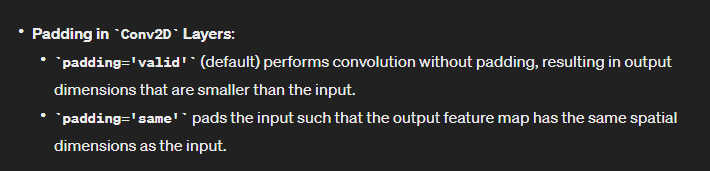

#Feature Map Dimensions
The dimensions of the feature maps change based on the configuration of convolutional layers, strides, and padding.

In [ ]:
# Define a CNN model and examine feature map dimensions
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2))
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_28 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_37 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


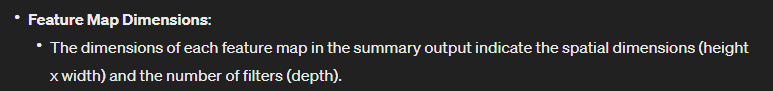

#Average Pooling

Average pooling is another type of pooling operation commonly used in convolutional neural networks (CNNs) alongside max pooling. While max pooling retains the maximum value within each pooling region, average pooling computes the average value over the same region.

In [ ]:
from tensorflow.keras import layers, models

# Define a CNN model with average pooling
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.AveragePooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.AveragePooling2D((2, 2))
])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 average_pooling2d (Average  (None, 13, 13, 32)        0         
 Pooling2D)                                                      
                                                                 
 conv2d_39 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 64)          0         
 gePooling2D)                                                    
                                                                 
Total params: 18816 (73.50 KB)
Trainable params: 18816 (73.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


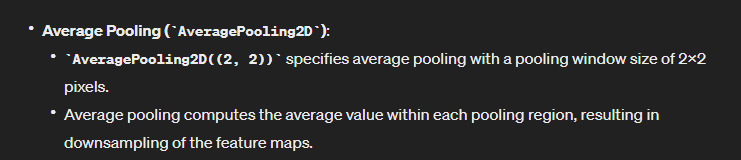

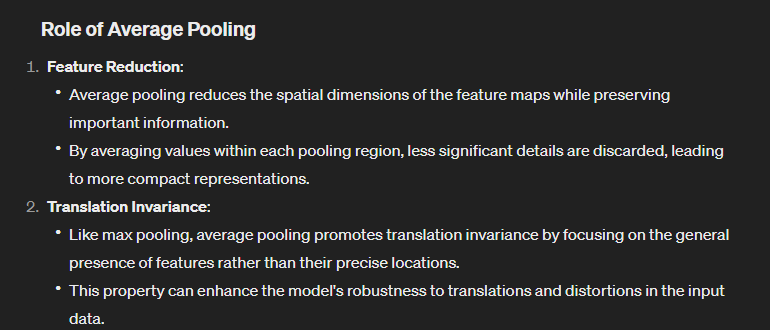

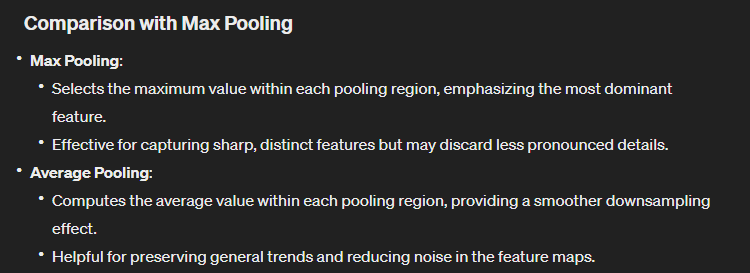

In [ ]:
# Apply average pooling to a feature map
import numpy as np

feature_map = np.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12],
    [13, 14, 15, 16]
])

# Average pooling with a 2x2 pooling window
pooled_map = np.mean(feature_map.reshape(2, 2, 2, 2), axis=(1, 3))
print("Feature Map:")
print(feature_map)
print("\nAverage Pooled Map:")
print(pooled_map)

Feature Map:
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]

Average Pooled Map:
[[ 3.5  5.5]
 [11.5 13.5]]


#CNN Architectures:

* LeNet: Explore the classic LeNet architecture proposed by Yann LeCun for handwritten digit recognition.
* AlexNet: Study the pioneering AlexNet architecture by Alex Krizhevsky et al., which revolutionized image classification tasks.
* VGGNet: Understand the VGG (Visual Geometry Group) architectures known for their simplicity and effectiveness.
* GoogLeNet (Inception): Dive into the Inception modules designed to capture multi-scale features efficiently.
* ResNet: Explore residual connections and the benefits of deep residual networks in tackling vanishing gradient problems.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

#1. LeNet
The LeNet architecture, proposed by Yann LeCun et al., is one of the earliest CNN architectures used for handwritten digit recognition.

In [ ]:
# LeNet architecture for MNIST
def build_lenet():
    model = models.Sequential([
        layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(16, (5, 5), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(120, activation='relu'),
        layers.Dense(84, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create and compile LeNet model
lenet_model = build_lenet()
lenet_model.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

# Train LeNet model
lenet_history = lenet_model.fit(train_images, train_labels, epochs=10, validation_split=0.1)

# Evaluate LeNet model
test_loss, test_acc = lenet_model.evaluate(test_images, test_labels)
print(f"Test Accuracy (LeNet): {test_acc}")


Epoch 1/10
1688/1688 [==============================] - 28s 16ms/step - loss: 0.1935 - accuracy: 0.9400 - val_loss: 0.0691 - val_accuracy: 0.9782
Epoch 2/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0660 - accuracy: 0.9794 - val_loss: 0.0460 - val_accuracy: 0.9857
Epoch 3/10
1688/1688 [==============================] - 26s 16ms/step - loss: 0.0480 - accuracy: 0.9851 - val_loss: 0.0400 - val_accuracy: 0.9888
Epoch 4/10
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0374 - accuracy: 0.9880 - val_loss: 0.0421 - val_accuracy: 0.9877
Epoch 5/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0319 - accuracy: 0.9896 - val_loss: 0.0526 - val_accuracy: 0.9863
Epoch 6/10
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0253 - accuracy: 0.9920 - val_loss: 0.0378 - val_accuracy: 0.9897
Epoch 7/10
1688/1688 [==============================] - 30s 18ms/step - loss: 0.0222 - accuracy: 0.9923 - val_loss: 0.0345 -

#2. AlexNet
AlexNet, designed by Alex Krizhevsky et al., was a breakthrough CNN architecture that significantly advanced image classification tasks.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def build_alexnet_mnist():
    model = models.Sequential([
        # First convolutional layer
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        # Second convolutional layer
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        # Third convolutional layer
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.BatchNormalization(),

        # Fourth convolutional layer
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),

        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the AlexNet-like model for MNIST
alexnet_mnist_model = build_alexnet_mnist()

# Compile the model
alexnet_mnist_model.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Display model summary
alexnet_mnist_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 batch_normalization_8 (Bat  (None, 14, 14, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_61 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_45 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                     

In [ ]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the AlexNet-like model on MNIST with EarlyStopping
history = alexnet_mnist_model.fit(train_images, train_labels, epochs=20, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = alexnet_mnist_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

Epoch 1/20
1688/1688 [==============================] - 244s 145ms/step - loss: 0.1828 - accuracy: 0.9519 - val_loss: 0.0459 - val_accuracy: 0.9880
Epoch 2/20
1688/1688 [==============================] - 243s 144ms/step - loss: 0.0947 - accuracy: 0.9765 - val_loss: 0.0439 - val_accuracy: 0.9880
Epoch 3/20
1688/1688 [==============================] - 239s 142ms/step - loss: 0.0758 - accuracy: 0.9810 - val_loss: 0.0532 - val_accuracy: 0.9872
Epoch 4/20
1688/1688 [==============================] - 239s 142ms/step - loss: 0.0671 - accuracy: 0.9841 - val_loss: 0.0386 - val_accuracy: 0.9923
Epoch 5/20
1688/1688 [==============================] - 243s 144ms/step - loss: 0.0548 - accuracy: 0.9869 - val_loss: 0.0655 - val_accuracy: 0.9892
Epoch 6/20
1688/1688 [==============================] - 239s 142ms/step - loss: 0.0507 - accuracy: 0.9886 - val_loss: 0.0474 - val_accuracy: 0.9897
Epoch 7/20
313/313 [==============================] - 11s 37ms/step - loss: 0.0378 - accuracy: 0.9905
Test Accur

#3. VGGNet

VGGNet, developed by the Visual Geometry Group (VGG) at the University of Oxford, is known for its simplicity and effectiveness with uniform architecture.



In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def build_vgg_mnist():
    model = models.Sequential([
        # Block 1
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Block 2
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Block 3
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D((2, 2)),

        # Flatten and fully connected layers
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

# Create the VGG-like model for MNIST
vgg_mnist_model = build_vgg_mnist()

# Compile the model
vgg_mnist_model.compile(optimizer='adam',
                        loss='sparse_categorical_crossentropy',
                        metrics=['accuracy'])

# Display model summary
vgg_mnist_model.summary()

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the VGG-like model on MNIST with EarlyStopping
history = vgg_mnist_model.fit(train_images, train_labels, epochs=10, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = vgg_mnist_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_76 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_77 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_53 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_78 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 conv2d_79 (Conv2D)          (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_54 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                               

#4. GoogLeNet (Inception)

Dive into the Inception modules designed to capture multi-scale features efficiently.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def build_googlenet_mnist():
    inputs = layers.Input(shape=(28, 28, 1))

    # Initial convolutional layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Inception module blocks
    x = inception_block(x, filters=[64, 128, 32, 32])
    x = inception_block(x, filters=[128, 192, 96, 64])

    # Flatten and fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=outputs)
    return model

# Define a function to create an Inception block
def inception_block(x, filters):
    # 1x1 convolution branch
    conv1x1 = layers.Conv2D(filters[0], (1, 1), padding='same', activation='relu')(x)

    # 3x3 convolution branch
    conv3x3 = layers.Conv2D(filters[1], (1, 1), padding='same', activation='relu')(x)
    conv3x3 = layers.Conv2D(filters[1], (3, 3), padding='same', activation='relu')(conv3x3)

    # 5x5 convolution branch
    conv5x5 = layers.Conv2D(filters[2], (1, 1), padding='same', activation='relu')(x)
    conv5x5 = layers.Conv2D(filters[2], (5, 5), padding='same', activation='relu')(conv5x5)

    # Max pooling branch
    max_pool = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    max_pool = layers.Conv2D(filters[3], (1, 1), padding='same', activation='relu')(max_pool)

    # Concatenate the outputs along the channel axis
    return layers.concatenate([conv1x1, conv3x3, conv5x5, max_pool], axis=-1)

# Create the GoogLeNet (Inception) model for MNIST
googlenet_mnist_model = build_googlenet_mnist()

# Compile the model
googlenet_mnist_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

# Display model summary
googlenet_mnist_model.summary()

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the GoogLeNet (Inception) model on MNIST with EarlyStopping
history = googlenet_mnist_model.fit(train_images, train_labels, epochs=5, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = googlenet_mnist_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 14, 14, 64)           3200      ['input_1[0][0]']             
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 7, 7, 64)             0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_2 (Conv2D)           (None, 7, 7, 128)            8320      ['max_pooling2d[0][0]']   

#5. ResNet

Explore residual connections and the benefits of deep residual networks in tackling vanishing gradient problems.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def residual_block(x, filters, strides=1):
    # Shortcut path (identity mapping)
    shortcut = x

    # Main path
    x = layers.Conv2D(filters, (3, 3), strides=strides, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(filters, (3, 3), strides=1, padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut connection
    if strides != 1:
        shortcut = layers.Conv2D(filters, (1, 1), strides=strides, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Add shortcut to main path (residual connection)
    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

def build_resnet_mnist():
    inputs = layers.Input(shape=(28, 28, 1))

    # Initial convolutional layer
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    # Global average pooling and fully connected layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=x)
    return model

# Create the ResNet model for MNIST
resnet_mnist_model = build_resnet_mnist()

# Compile the model
resnet_mnist_model.compile(optimizer='adam',
                            loss='sparse_categorical_crossentropy',
                            metrics=['accuracy'])

# Display model summary
resnet_mnist_model.summary()

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the ResNet model on MNIST with EarlyStopping
history = resnet_mnist_model.fit(train_images, train_labels, epochs=5, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = resnet_mnist_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_13 (Conv2D)          (None, 14, 14, 64)           3200      ['input_2[0][0]']             
                                                                                                  
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)             0         ['conv2d_13[0][0]']           
 g2D)                                                                                             
                                                                                                  
 conv2d_14 (Conv2D)          (None, 7, 7, 64)             36928     ['max_pooling2d_3[0][0]'

#MobileNet:
Learn about lightweight architectures optimized for mobile and edge devices.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def build_mobilenet_mnist():
    inputs = layers.Input(shape=(28, 28, 1))

    # Depthwise separable convolutional layers
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.DepthwiseConv2D((3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)

    # Global average pooling and fully connected layer
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=x)
    return model

# Create the corrected MobileNet model for MNIST
mobilenet_mnist_model = build_mobilenet_mnist()

# Compile the model
mobilenet_mnist_model.compile(optimizer='adam',
                              loss='sparse_categorical_crossentropy',
                              metrics=['accuracy'])

# Display model summary
mobilenet_mnist_model.summary()

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the MobileNet model on MNIST with EarlyStopping
history = mobilenet_mnist_model.fit(train_images, train_labels, epochs=5, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = mobilenet_mnist_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 batch_normalization_10 (Ba  (None, 28, 28, 64)        256       
 tchNormalization)                                               
                                                                 
 depthwise_conv2d_3 (Depthw  (None, 14, 14, 64)        640       
 iseConv2D)                                                      
                                                                 
 batch_normalization_11 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)                                               
                                                           

#EfficientNet:
Study the principles behind scaling up neural networks efficiently with compound scaling.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

def build_efficientnet_mnist():
    inputs = layers.Input(shape=(28, 28, 1))

    # EfficientNet-like architecture
    x = layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(10, activation='softmax')(x)

    model = models.Model(inputs=inputs, outputs=x)
    return model

# Create the EfficientNet model for MNIST
efficientnet_mnist_model = build_efficientnet_mnist()

# Compile the model
efficientnet_mnist_model.compile(optimizer='adam',
                                 loss='sparse_categorical_crossentropy',
                                 metrics=['accuracy'])

# Display model summary
efficientnet_mnist_model.summary()

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images = train_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0
test_images = test_images.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Define EarlyStopping callback
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the EfficientNet model on MNIST with EarlyStopping
history = efficientnet_mnist_model.fit(train_images, train_labels, epochs=5, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model on test data
test_loss, test_acc = efficientnet_mnist_model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_26 (Conv2D)          (None, 14, 14, 32)        320       
                                                                 
 batch_normalization_17 (Ba  (None, 14, 14, 32)        128       
 tchNormalization)                                               
                                                                 
 conv2d_27 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 batch_normalization_18 (Ba  (None, 7, 7, 64)          256       
 tchNormalization)                                               
                                                                 
 conv2d_28 (Conv2D)          (None, 4, 4, 128)         7385

#Transfer Learning with Pre-trained Models

#1. VGG16

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.datasets import mnist

# Load and preprocess a subset of the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[:1000]  # Use a subset of training data (e.g., first 1000 samples)
test_images = test_images[:500]      # Use a subset of test data (e.g., first 500 samples)
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Resize images to a smaller dimension (e.g., 96x96) for VGG16 input
def resize_images(images, target_size):
    resized_images = tf.image.resize(images, target_size)
    return tf.tile(resized_images, [1, 1, 1, 3])  # Tile grayscale images to RGB (3 channels)

target_size = (96, 96)
train_images_resized = resize_images(train_images, target_size)
test_images_resized = resize_images(test_images, target_size)

# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=target_size + (3,))

# Extract features using VGG16
train_features = base_model.predict(train_images_resized)
test_features = base_model.predict(test_images_resized)

# Flatten extracted features
train_features = train_features.reshape(train_features.shape[0], -1)
test_features = test_features.reshape(test_features.shape[0], -1)

# Define and train a classifier on extracted features (e.g., Dense layers)
classifier = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=train_features.shape[1:]),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(train_features, train_labels[:train_features.shape[0]], epochs=10, validation_split=0.1)

# Evaluate the classifier on test features
test_loss, test_acc = classifier.evaluate(test_features, test_labels[:test_features.shape[0]])
print(f"Test Accuracy (Feature Extraction with VGG16): {test_acc}")

16/16 [==============================] - 47s 3s/step
Epoch 1/10
29/29 [==============================] - 1s 25ms/step - loss: 1.4791 - accuracy: 0.5100 - val_loss: 0.7332 - val_accuracy: 0.7500
Epoch 2/10
29/29 [==============================] - 1s 18ms/step - loss: 0.6041 - accuracy: 0.8244 - val_loss: 0.4391 - val_accuracy: 0.8600
Epoch 3/10
29/29 [==============================] - 0s 17ms/step - loss: 0.3517 - accuracy: 0.9111 - val_loss: 0.3826 - val_accuracy: 0.8800
Epoch 4/10
29/29 [==============================] - 1s 17ms/step - loss: 0.2747 - accuracy: 0.9300 - val_loss: 0.2860 - val_accuracy: 0.9000
Epoch 5/10
29/29 [==============================] - 0s 17ms/step - loss: 0.2629 - accuracy: 0.9356 - val_loss: 0.2155 - val_accuracy: 0.9300
Epoch 6/10
29/29 [==============================] - 1s 18ms/step - loss: 0.1923 - accuracy: 0.9467 - val_loss: 0.1953 - val_accuracy: 0.9300
Epoch 7/10
29/29 [==============================] - 1s 25ms/step - loss: 0.1475 - accuracy: 0.9644 - 

#2. ResNet50

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[:1000]  # Use a subset of training data (e.g., first 1000 samples)
test_images = test_images[:500]      # Use a subset of test data (e.g., first 500 samples)
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Load pre-trained ResNet50 model (excluding top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Resize and preprocess images for ResNet50 input (224x224 RGB)
def preprocess_images(images, target_size=(224, 224)):
    images_resized = tf.image.resize(images, target_size)
    images_rgb = tf.tile(images_resized, [1, 1, 1, 3])  # Convert grayscale to RGB
    return images_rgb

# Extract features using ResNet50 in batches
def extract_features(images, batch_size=32):
    num_samples = images.shape[0]
    features_list = []
    for i in range(0, num_samples, batch_size):
        batch_images = images[i:i+batch_size]
        batch_features = base_model.predict(preprocess_images(batch_images))
        features_list.append(batch_features)
    return tf.concat(features_list, axis=0)

# Extract features from train and test images
train_features = extract_features(train_images)
test_features = extract_features(test_images)

# Flatten extracted features
train_features = tf.reshape(train_features, (train_features.shape[0], -1))
test_features = tf.reshape(test_features, (test_features.shape[0], -1))

# Define and train a classifier on extracted features (e.g., Dense layers)
classifier = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=train_features.shape[1:]),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(train_features, train_labels[:train_features.shape[0]], epochs=10, validation_split=0.1)

# Evaluate the classifier on test features
test_loss, test_acc = classifier.evaluate(test_features, test_labels[:test_features.shape[0]])
print(f"Test Accuracy (Feature Extraction with ResNet50): {test_acc}")

1/1 [==============================] - 3s 3s/step
Epoch 1/10
29/29 [==============================] - 16s 504ms/step - loss: 7.4222 - accuracy: 0.1089 - val_loss: 2.2868 - val_accuracy: 0.1100
Epoch 2/10
29/29 [==============================] - 14s 489ms/step - loss: 2.3075 - accuracy: 0.1011 - val_loss: 2.3031 - val_accuracy: 0.1000
Epoch 3/10
29/29 [==============================] - 14s 488ms/step - loss: 2.3071 - accuracy: 0.1078 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 4/10
29/29 [==============================] - 14s 488ms/step - loss: 2.3019 - accuracy: 0.1178 - val_loss: 2.3028 - val_accuracy: 0.1000
Epoch 5/10
29/29 [==============================] - 14s 489ms/step - loss: 2.3016 - accuracy: 0.1178 - val_loss: 2.3021 - val_accuracy: 0.1000
Epoch 6/10
29/29 [==============================] - 20s 685ms/step - loss: 2.3014 - accuracy: 0.1178 - val_loss: 2.3015 - val_accuracy: 0.1000
Epoch 7/10
29/29 [==============================] - 21s 725ms/step - loss: 2.3011 - accuracy

#3. MobileNetV2

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.datasets import mnist

# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images[:1000]  # Use a subset of training data (e.g., first 1000 samples)
test_images = test_images[:500]      # Use a subset of test data (e.g., first 500 samples)
train_images = train_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((-1, 28, 28, 1)).astype('float32') / 255.0

# Load pre-trained MobileNetV2 model (excluding top layers)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Resize and preprocess images for MobileNetV2 input (224x224 RGB)
def preprocess_images(images, target_size=(224, 224)):
    images_resized = tf.image.resize(images, target_size)
    images_rgb = tf.tile(images_resized, [1, 1, 1, 3])  # Convert grayscale to RGB
    return images_rgb

# Extract features using MobileNetV2 in batches
def extract_features(images, batch_size=32):
    num_samples = images.shape[0]
    features_list = []
    for i in range(0, num_samples, batch_size):
        batch_images = images[i:i+batch_size]
        batch_features = base_model.predict(preprocess_images(batch_images))
        features_list.append(batch_features)
    return tf.concat(features_list, axis=0)

# Extract features from train and test images
train_features = extract_features(train_images)
test_features = extract_features(test_images)

# Flatten extracted features
train_features = tf.reshape(train_features, (train_features.shape[0], -1))
test_features = tf.reshape(test_features, (test_features.shape[0], -1))

# Define and train a classifier on extracted features (e.g., Dense layers)
classifier = models.Sequential([
    layers.Dense(256, activation='relu', input_shape=train_features.shape[1:]),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
classifier.fit(train_features, train_labels[:train_features.shape[0]], epochs=10, validation_split=0.1)

# Evaluate the classifier on test features
test_loss, test_acc = classifier.evaluate(test_features, test_labels[:test_features.shape[0]])
print(f"Test Accuracy (Feature Extraction with MobileNetV2): {test_acc}")

1/1 [==============================] - 1s 557ms/step
Epoch 1/10
29/29 [==============================] - 10s 333ms/step - loss: 7.2716 - accuracy: 0.5911 - val_loss: 0.6324 - val_accuracy: 0.8600
Epoch 2/10
29/29 [==============================] - 9s 323ms/step - loss: 0.6049 - accuracy: 0.8222 - val_loss: 0.3626 - val_accuracy: 0.9200
Epoch 3/10
29/29 [==============================] - 8s 287ms/step - loss: 0.4535 - accuracy: 0.8522 - val_loss: 0.3343 - val_accuracy: 0.9300
Epoch 4/10
29/29 [==============================] - 9s 327ms/step - loss: 0.3053 - accuracy: 0.8900 - val_loss: 0.2011 - val_accuracy: 0.9400
Epoch 5/10
29/29 [==============================] - 9s 324ms/step - loss: 0.2865 - accuracy: 0.9122 - val_loss: 0.3639 - val_accuracy: 0.9200
Epoch 6/10
29/29 [==============================] - 9s 298ms/step - loss: 0.2700 - accuracy: 0.9256 - val_loss: 0.2274 - val_accuracy: 0.9700
Epoch 7/10
29/29 [==============================] - 10s 329ms/step - loss: 0.2036 - accuracy: 